In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('datasets/breast-cancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Count number of missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df = df.drop('id',axis=1)


In [13]:
features = df.drop('diagnosis', axis=1)
label = df['diagnosis']

np.unique(label, return_counts=True)

(array(['B', 'M'], dtype=object), array([357, 212], dtype=int64))

In [14]:
# Under Sampling Dataset
from imblearn.under_sampling import AllKNN
features, label = AllKNN(n_neighbors=7).fit_resample(features, label)

In [15]:
np.unique(label, return_counts=True)

(array(['B', 'M'], dtype=object), array([274, 212], dtype=int64))

In [22]:
from sklearn.preprocessing import  LabelEncoder

label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)




<class 'numpy.ndarray'>


In [23]:
cancer_classes = ['B','M']
from sklearn.model_selection import train_test_split,cross_val_score
X , y = features.values, label
X_train, X_test, y_train, y_test = train_test_split(X, label,test_size=0.3, stratify=label,random_state=0)


print(f"Training set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Training set:340
Test set:146


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score,roc_curve

feature_columns = [i for i in range(0,30)]
feature_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess',feature_transformer,feature_columns)
    ])



col_order = ['Model','Accuracy','Precision','Recall','F1 Score','TP','FP','FN','TN']
models = [RandomForestClassifier(),
          GradientBoostingClassifier(),
          SVC(probability=True)]

model_names = ['Random Forest Classifier',
               'Gradient Boosting Classifer',
                'SVC ']

results  = pd.DataFrame(columns=col_order)

for name, model in enumerate(models):
    # Perform five fold cross validation
    scores = cross_val_score(model, X_train,y_train, cv=5, scoring='accuracy')

    # store average accuracy across the folds
    acc = np.mean(scores)

    #fit the model on the training set
    pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', model)
    ])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29])])),
                ('classifier', SVC(probability=True))])


Confusion Matrix:
 [[79  3]
 [ 2 62]] 

Accuracy: 0.9657534246575342
Overall Precision: 0.9538461538461539
Overall Recall: 0.96875
AUC: 0.9952362804878049


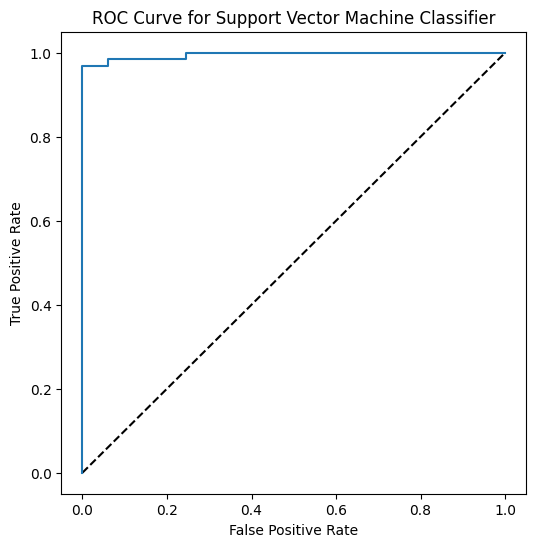

In [33]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm  = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"ROC Curve for Support Vector Machine Classifier")
plt.show()


